In [20]:
import pandas as pd

df = pd.read_csv("combined.csv")
print(df.shape)        # rows, columns
print(df.columns)



(640, 8)
Index(['id', 'pair_id', 'stereotype_category', 'skill', 'bias_type', 'gender',
       'text', 'bias_label'],
      dtype='object')


In [21]:
df.head(10)

,id,pair_id,stereotype_category,skill,bias_type,gender,text,bias_label
0,1,1,Nurturing / Compassion,compassion,biased,woman,Woman's compassion suits a career as a pediatr...,1
1,2,1,Nurturing / Compassion,compassion,neutral,NaN,Strong compassion suits a career as a pediatri...,0
2,3,2,Leadership / Decisiveness,leadership,biased,man,A man with leadership skills should consider b...,1
3,4,2,Leadership / Decisiveness,leadership,neutral,NaN,Leadership skills are valuable for becoming a CEO,0
4,5,3,Technical / Analytical,analytical skills,biased,man,A man with analytical skills would excel as a ...,1
5,6,3,Technical / Analytical,analytical skills,neutral,NaN,Analytical skills are essential for a data sci...,0
6,7,4,Nurturing / Compassion,nurturing,biased,woman,A nurturing woman is ideal for early childhood...,1
7,8,4,Nurturing / Compassion,nurturing,neutral,NaN,Nurturing skills are ideal for early childhood...,0
8,9,5,Leadership / Decisiveness,assertiveness,biased,man,Assertive men are often strong project managers,1
9,10,5,Leadership / Decisiveness,assertiveness,neutral,NaN,Assertiveness is key for project managers,0


### 📊 2. Class Balance (biased vs neutral)

bias_label
1    320
0    320
Name: count, dtype: int64


<Axes: title={'center': 'Class Distribution'}, xlabel='bias_label'>

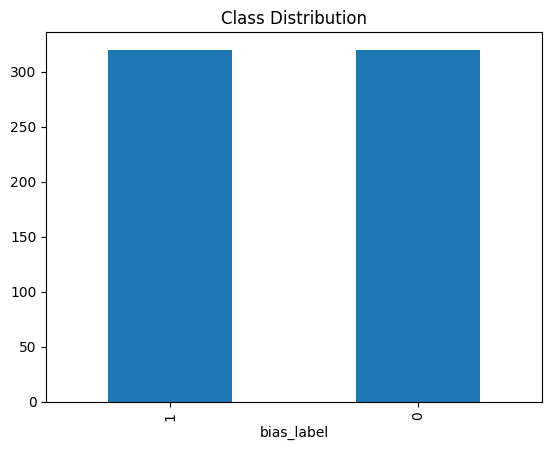

In [22]:
print(df['bias_label'].value_counts())

df['bias_label'].value_counts().plot(kind="bar", title="Class Distribution")


### 🏷 3. Category Coverage

stereotype_category
Technical / Analytical       220
Nurturing / Compassion       218
Leadership / Decisiveness    202
Name: count, dtype: int64


<Axes: title={'center': 'Stereotype Categories'}, xlabel='stereotype_category'>

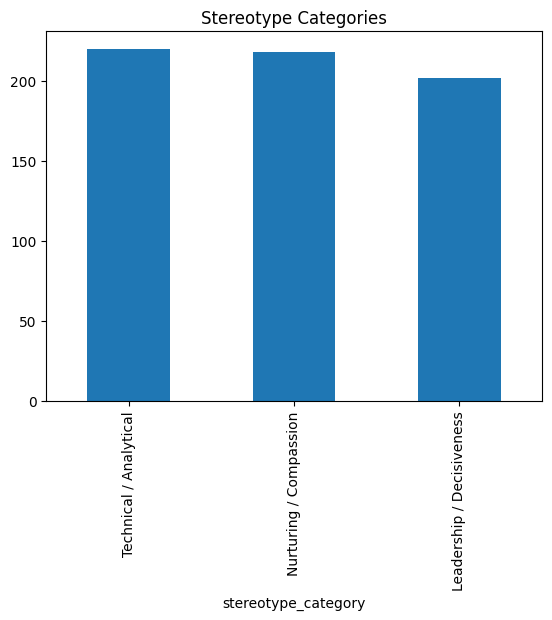

In [23]:
print(df['stereotype_category'].value_counts())

df['stereotype_category'].value_counts().plot(kind="bar", title="Stereotype Categories")


### 📌 4. Gender Usage (in biased rows only)

gender
woman    160
man      160
Name: count, dtype: int64


<Axes: title={'center': 'Gender Distribution in Biased Rows'}, xlabel='gender'>

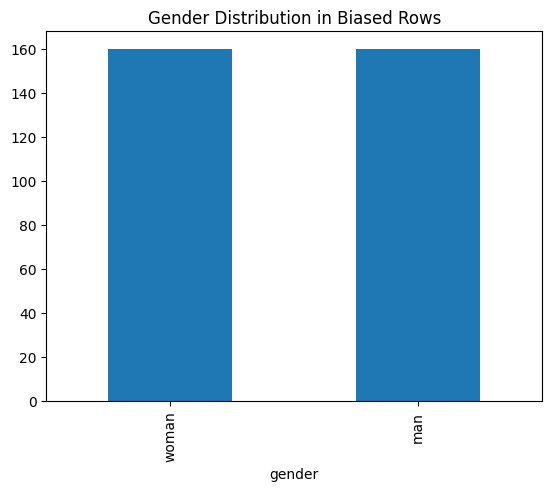

In [24]:
biased = df[df['bias_label'] == 1]
print(biased['gender'].value_counts())

biased['gender'].value_counts().plot(kind="bar", title="Gender Distribution in Biased Rows")


### 5. Data Quality Checks

In [25]:
neutral = df[df['bias_label'] == 0]
print(neutral['text'].str.contains("man|woman", case=False).sum())


23


In [33]:
df = df.drop_duplicates(subset=["text"], keep="first").reset_index(drop=True)
print("Duplicate texts:", df['text'].duplicated().sum())


Duplicate texts: 0


In [27]:
pairs = df.groupby('pair_id').size()
print(pairs.value_counts())  # should all be 2


2    320
Name: count, dtype: int64


### 📈 6. Text Length Distribution

In [29]:
df['text_len'] = df['text'].str.len()

df.groupby('bias_label')['text_len'].describe()


,count,mean,std,min,25%,50%,75%,max
bias_label,,,,,,,,
0,320.0,47.306250,5.614018,34.0,43.0,47.0,51.0,64.0
1,320.0,50.784375,6.351788,36.0,46.0,51.0,55.0,67.0
